In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

percap_path = Path("./dataset/GCB2022v27_percapita_flat.csv")
total_path   = Path("./dataset/GCB2022v27_MtCO2_flat.csv")

df_pc = pd.read_csv(percap_path)
df_tt = pd.read_csv(total_path)

df_pc = df_pc.rename(columns={
    "ISO 3166-1 alpha-3": "iso3",
    "Total":  "co2_pc_total",
    "Coal":   "co2_pc_coal",
    "Oil":    "co2_pc_oil",
    "Gas":    "co2_pc_gas",
    "Cement": "co2_pc_cement",
    "Flaring":"co2_pc_flaring",
    "Other":  "co2_pc_other",})

df_tt = df_tt.rename(columns={
    "ISO 3166-1 alpha-3": "iso3",
    "Total": "co2_total_mt" })

#select data year (2000–2023)
df_pc = df_pc[(df_pc["Year"]>=2000) & (df_pc["Year"]<=2023)].copy()
df_tt = df_tt[(df_tt["Year"]>=2000) & (df_tt["Year"]<=2023)].copy()

sector_cols = [c for c in df_pc.columns if c.startswith("co2_pc_")]
df_pc[sector_cols] = df_pc[sector_cols].fillna(0.0)

big_pop = ['China',"India","Indonesia","United States","Nigeria","Pakistan","Brazil","Japan","Thailand","Russia"]          
small_rich = ["Singapore","Qatar","Norway","Maldives","Bhutan","Brunei Darussalam","Kuwait","United Arab Emirates","New Zealand","Switzerland"]      
focus = big_pop + small_rich

outdir = Path("./figs"); outdir.mkdir(exist_ok=True)



In [14]:
df_pc

Country iso3  Year  co2_pc_total  co2_pc_coal  co2_pc_oil  \
250    Afghanistan  AFG  2000      0.053581     0.000187    0.040309   
251    Afghanistan  AFG  2001      0.054300     0.003536    0.038708   
252    Afghanistan  AFG  2002      0.063856     0.002624    0.034639   
253    Afghanistan  AFG  2003      0.068871     0.004054    0.043788   
254    Afghanistan  AFG  2004      0.052529     0.003889    0.038579   
...            ...  ...   ...           ...          ...         ...   
63099       Global  WLD  2017      4.749682     1.908857    1.610910   
63100       Global  WLD  2018      4.792753     1.919213    1.596350   
63101       Global  WLD  2019      4.775633     1.896468    1.589920   
63102       Global  WLD  2020      4.497423     1.807760    1.427353   
63103       Global  WLD  2021      4.693699     1.893923    1.496614   

       co2_pc_gas  co2_pc_cement  co2_pc_flaring  co2_pc_other  
250      0.011437       0.000523        0.001125      0.000000  
251      0.010608       0.000332        0.001117      0.000000  
252      0.026067       0.000525        0.000000      0.000000  
253      0.020596       0.000433        0.000000      0.000000  
254      0.009645       0.000416        0.000000      0.000000  
...           ...            ...             ...           ...  
63099    0.940144       0.198416        0.051579      0.039776  
63100    0.979965       0.204225        0.053634      0.039366  
63101    0.984878       0.208309        0.056569      0.039490  
63102    0.963695       0.208844        0.051981      0.037789  
63103    1.001585       0.211472        0.052663      0.037443  

[5104 rows x 10 columns]

In [15]:
df_tt

Country iso3  Year  co2_total_mt          Coal           Oil  \
250    Afghanistan  AFG  2000      1.047128      0.003664      0.787760   
251    Afghanistan  AFG  2001      1.069098      0.069616      0.762112   
252    Afghanistan  AFG  2002      1.340995      0.055109      0.727438   
253    Afghanistan  AFG  2003      1.559602      0.091813      0.991575   
254    Afghanistan  AFG  2004      1.237247      0.091600      0.908672   
...            ...  ...   ...           ...           ...           ...   
63099       Global  WLD  2017  36096.739276  14506.973805  12242.627935   
63100       Global  WLD  2018  36826.506600  14746.830688  12266.016285   
63101       Global  WLD  2019  37082.558969  14725.978025  12345.653374   
63102       Global  WLD  2020  35264.085734  14174.564010  11191.808551   
63103       Global  WLD  2021  37123.850352  14979.598083  11837.159116   

               Gas       Cement     Flaring       Other  Per Capita  
250       0.223504     0.010216    0.021984         NaN    0.053581  
251       0.208848     0.006538    0.021984         NaN    0.054300  
252       0.547416     0.011033    0.000000         NaN    0.063856  
253       0.466408     0.009807    0.000000         NaN    0.068871  
254       0.227168     0.009807    0.000000         NaN    0.052529  
...            ...          ...         ...         ...         ...  
63099  7144.928128  1507.923185  391.992176  302.294047    4.749682  
63100  7529.846784  1569.218392  412.115746  302.478706    4.792753  
63101  7647.528220  1617.506786  439.253991  306.638573    4.775633  
63102  7556.290283  1637.537532  407.583673  296.301685    4.497423  
63103  7921.829472  1672.592372  416.525563  296.145746    4.693699  

[5104 rows x 11 columns]

In [9]:
def save_tight(name):
    plt.tight_layout()
    plt.savefig(outdir / name, dpi=300)
    plt.show()

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

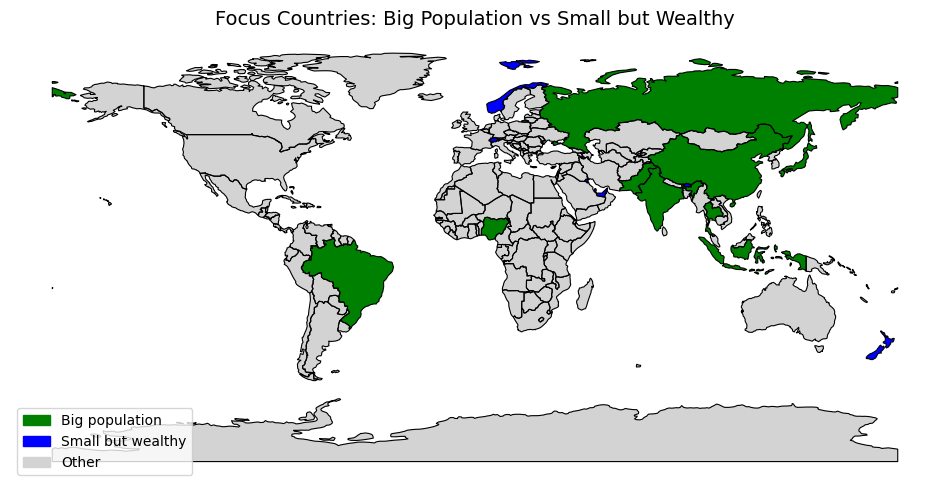

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt


# โหลดจาก Natural Earth 110m countries (ไฟล์ .shp)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())

big_pop = ["China","India","Indonesia","United States","Nigeria","Pakistan",
           "Brazil","Japan","Thailand","Russia"]
small_rich = ["Singapore","Qatar","Norway","Maldives","Bhutan","Brunei Darussalam",
              "Kuwait","United Arab Emirates","New Zealand","Switzerland"]


name_map = {"United States":"United States of America",
            "Russia":"Russian Federation",
            "Brunei Darussalam":"Brunei"}
big_ne   = {name_map.get(n,n) for n in big_pop}
small_ne = {name_map.get(n,n) for n in small_rich}

def cat(n):
    if n in big_pop: 
        return "Big population"
    if n in small_rich: 
        return "Small but wealthy"
    return "Other"

world["group"] = world["ADMIN"].apply(cat)

# mapping group → สี
color_map = {
    "Big population": "green",    
    "Small but wealthy": "blue",  
    "Other": "lightgrey"          
}

fig, ax = plt.subplots(figsize=(12,6))
world.boundary.plot(ax=ax, linewidth=0.8, color="black")

# plot ด้วยสี custom
world.plot(ax=ax, color=world["group"].map(color_map))

# เพิ่ม legend manual
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color="green", label="Big population"),
    mpatches.Patch(color="blue", label="Small but wealthy"),
    mpatches.Patch(color="lightgrey", label="Other")
]
ax.legend(handles=legend_handles, loc="lower left")

plt.title("Focus Countries: Big Population vs Small but Wealthy", fontsize=14)
ax.set_axis_off()
plt.show()

### Find a trends for each group

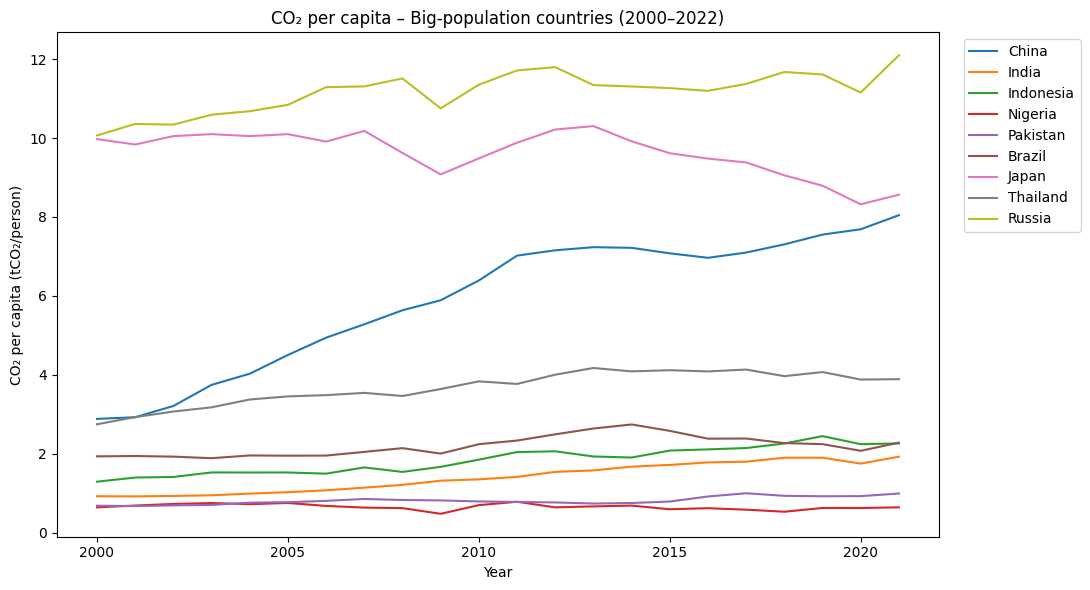

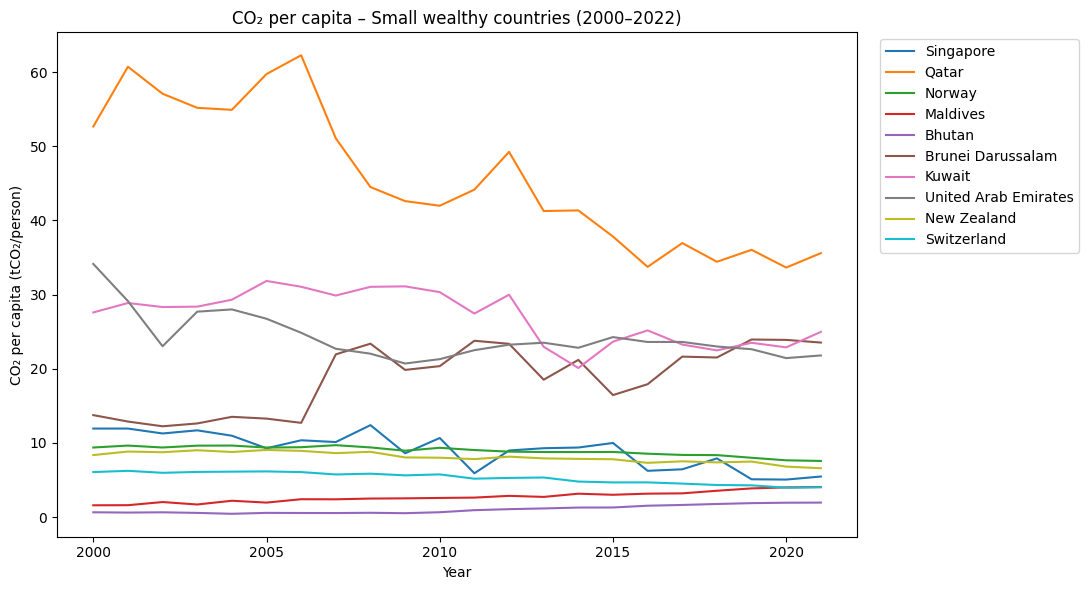

In [11]:
def plot_trend(countries, title, fname):
    plt.figure(figsize=(11,6))
    for c in countries:
        tmp = df_pc[df_pc["Country"] == c].sort_values("Year")
        if tmp.empty: 
            continue
        plt.plot(tmp["Year"], tmp["co2_pc_total"], label=c)
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel("CO₂ per capita (tCO₂/person)")
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", ncol=1)
    save_tight(fname)

plot_trend(big_pop,   "CO₂ per capita – Big-population countries (2000–2022)",
           "trend_big_population.png")
plot_trend(small_rich,"CO₂ per capita – Small wealthy countries (2000–2022)",
           "trend_small_wealthy.png")

Trends of per-capita CO₂ emissions (2000–2023). Small wealthy countries (e.g., Qatar, Singapore, Norway) consistently show high per-capita emissions, while large developing countries (e.g., India, Indonesia, Nigeria) remain at low levels despite gradual increases. This contrast illustrates how development stage influences emission intensity.

### Bar Chart 

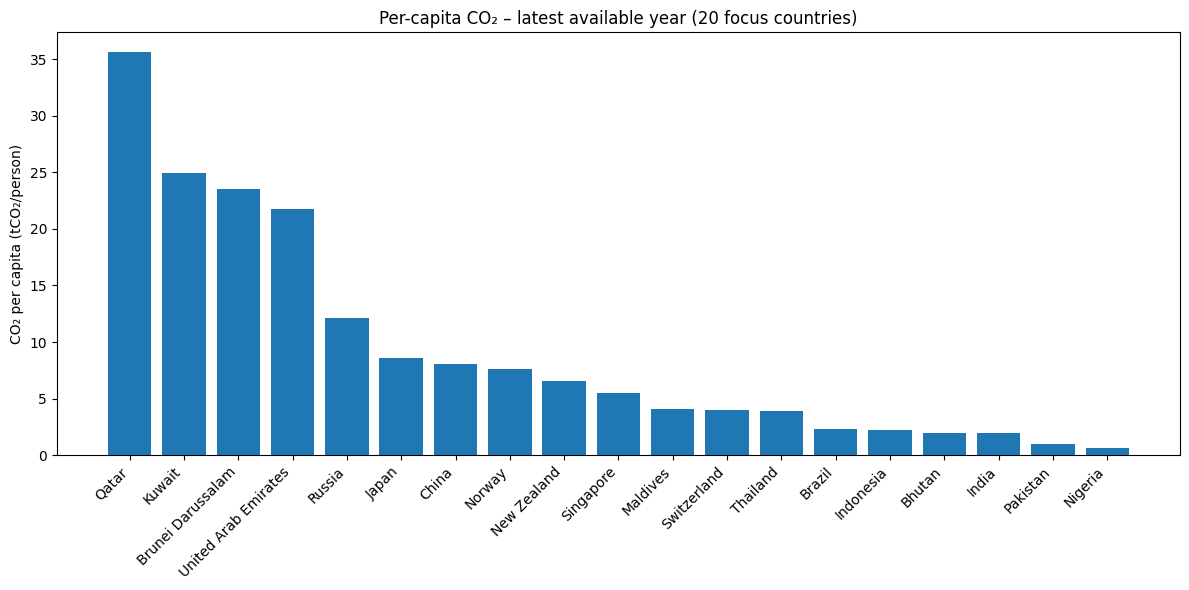

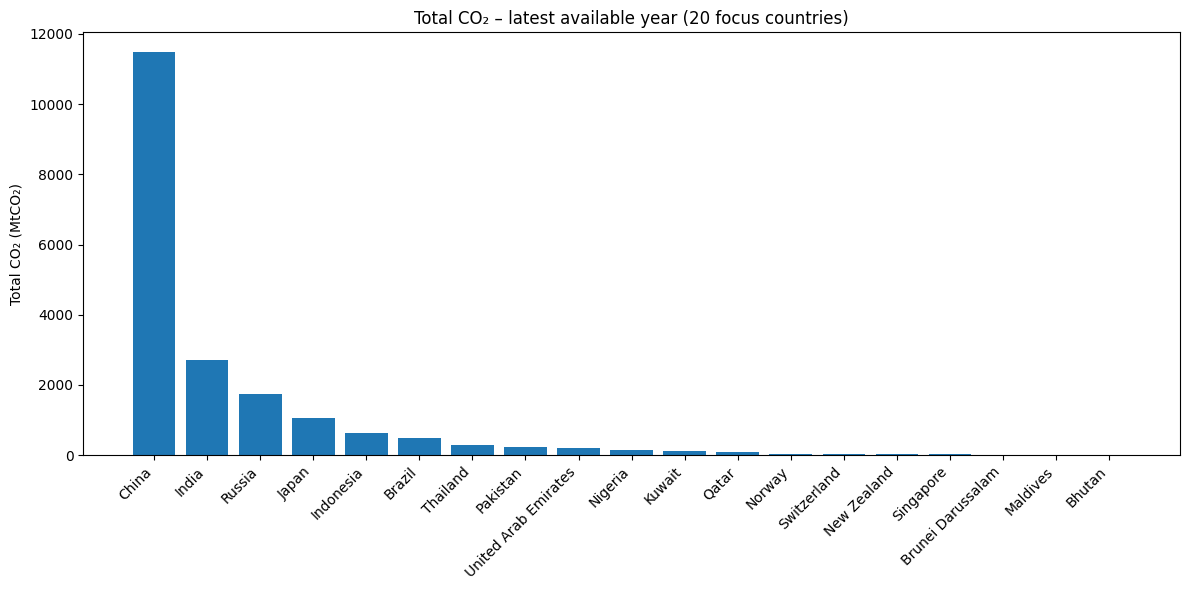

In [32]:
pc_latest = (df_pc.sort_values("Year")
             .groupby("Country", as_index=False).tail(1))
tt_latest = (df_tt.sort_values("Year")
             .groupby("Country", as_index=False).tail(1))

pc_latest_sel = pc_latest[pc_latest["Country"].isin(focus)].copy()
tt_latest_sel = tt_latest[tt_latest["Country"].isin(focus)].copy()

pc_latest_sel = pc_latest_sel.sort_values("co2_pc_total", ascending=False)
tt_latest_sel = tt_latest_sel.sort_values("co2_total_mt", ascending=False)

# Latest Year – Per Capita
plt.figure(figsize=(12,6))
plt.bar(pc_latest_sel["Country"], pc_latest_sel["co2_pc_total"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("CO₂ per capita (tCO₂/person)")
plt.title("Per-capita CO₂ – latest available year (20 focus countries)")
save_tight("bar_percapita_latest_focus.png")

# Latest Year – Total
plt.figure(figsize=(12,6))
plt.bar(tt_latest_sel["Country"], tt_latest_sel["co2_total_mt"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total CO₂ (MtCO₂)")
plt.title("Total CO₂ – latest available year (20 focus countries)")
save_tight("bar_total_latest_focus.png")

- Per-capita CO₂ emissions (latest year) for 20 selected countries. This metric allows fair comparison across countries of different population sizes. The results highlight that small but wealthy nations (Qatar, Kuwait, Singapore) emit disproportionately high CO₂ per person, while highly populated developing countries (India, Nigeria) show very low per-capita emissions despite having large total emissions. This contrast emphasizes the equity challenge in global climate negotiations.
- Total CO₂ emissions (latest available year, 20 selected countries). Despite low per-capita values, populous nations such as China and India contribute the most to global emissions in total, while small countries with high per-capita emissions contribute little to global totals.

## find signal for each source sectors

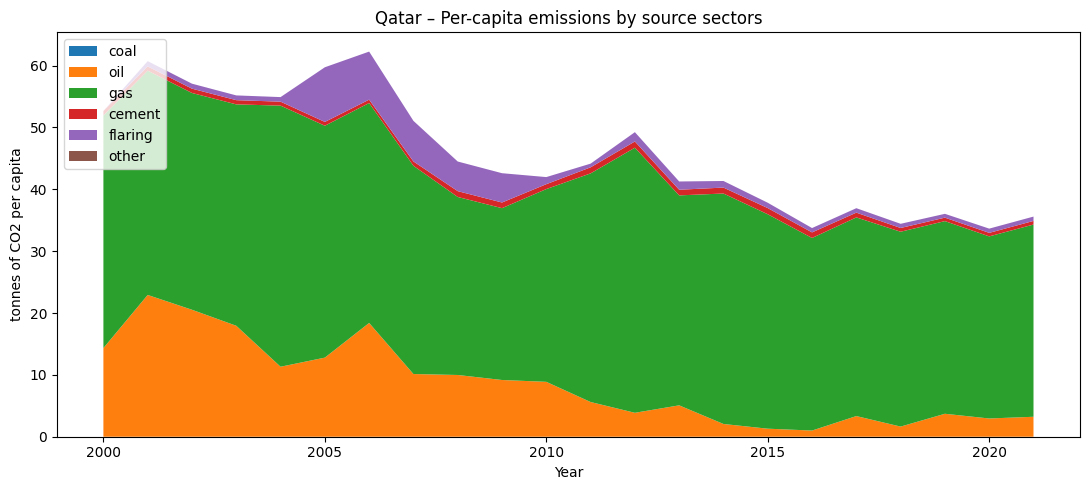

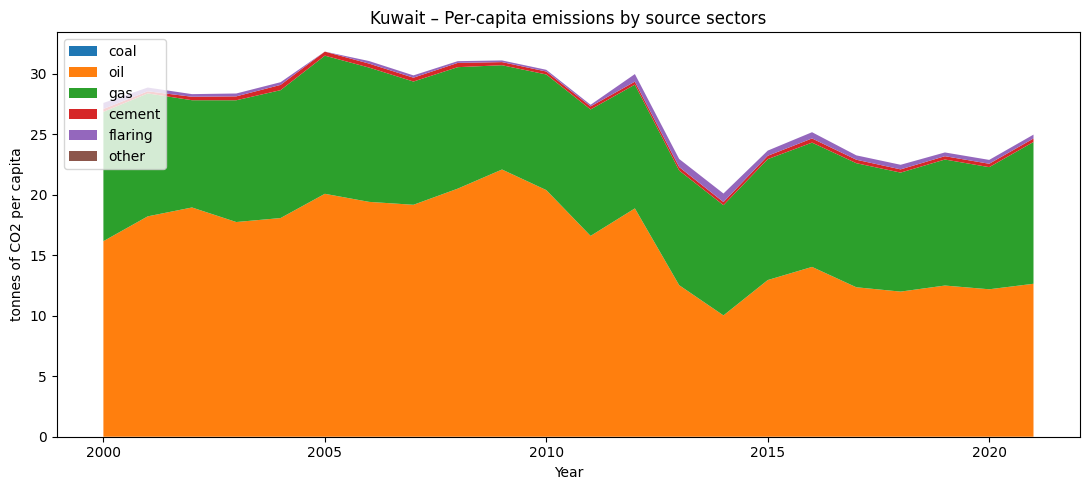

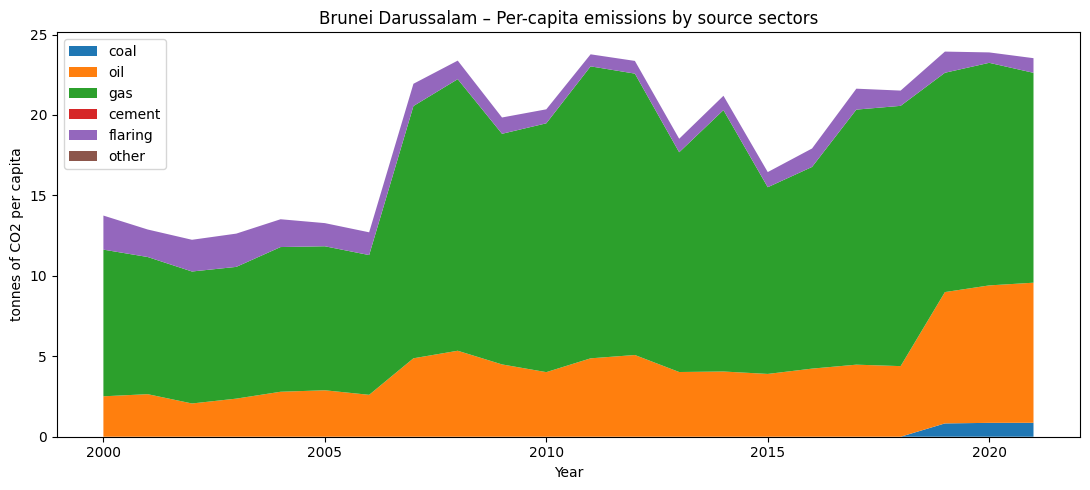

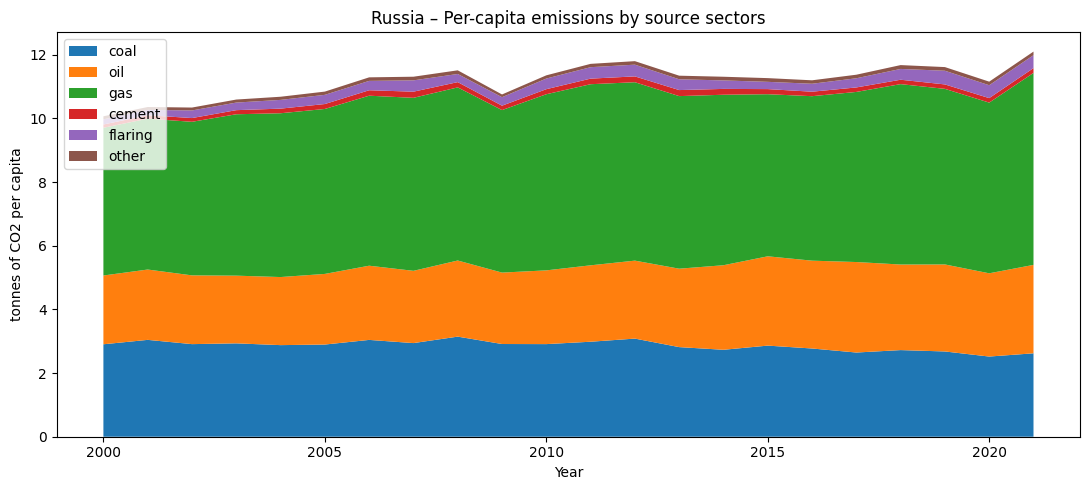

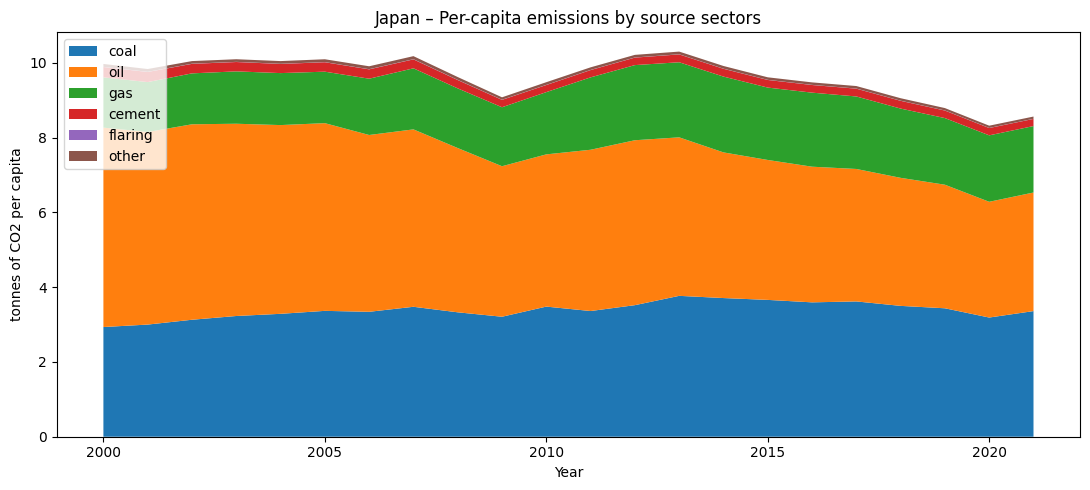

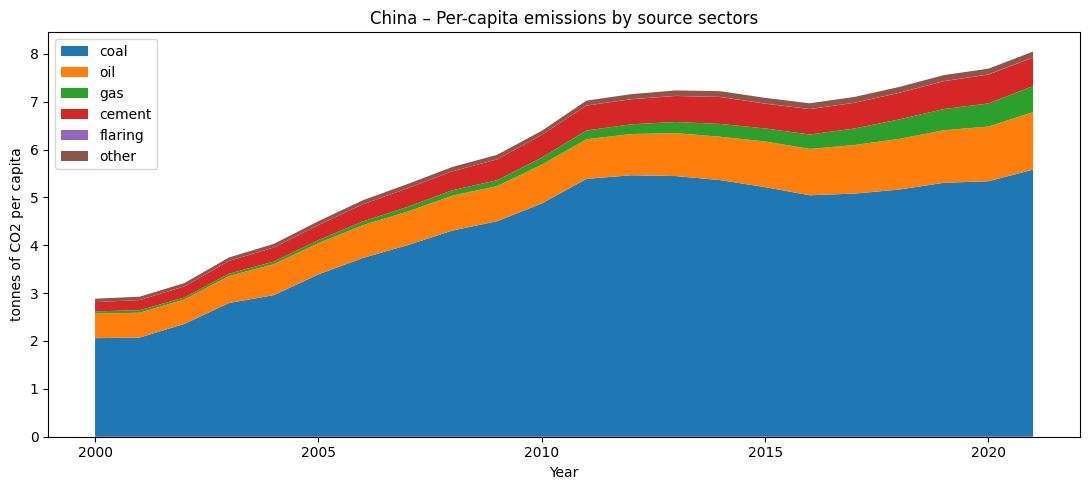

In [33]:
def top_k_countries(group_list, k=3):
    sub = pc_latest[pc_latest["Country"].isin(group_list)].copy()
    sub = sub.sort_values("co2_pc_total", ascending=False).head(k)
    return sub["Country"].tolist()

reps_small = top_k_countries(small_rich, k=3)
reps_big   = top_k_countries(big_pop, k=3)

def plot_stack(country):
    cols = ["co2_pc_coal","co2_pc_oil","co2_pc_gas","co2_pc_cement","co2_pc_flaring","co2_pc_other"]
    tmp = df_pc[df_pc["Country"]==country].sort_values("Year")
    if tmp.empty: 
        return
    plt.figure(figsize=(11,5))
    plt.stackplot(tmp["Year"], *[tmp[c] for c in cols],
                  labels=[c.replace("co2_pc_","") for c in cols])
    plt.title(f"{country} – Per-capita emissions by source sectors")
    plt.xlabel("Year"); plt.ylabel("tonnes of CO2 per capita")
    plt.legend(loc="upper left")
    save_tight(f"stack_sector_{country.replace(' ','_')}.png")

for c in reps_small + reps_big:
    plot_stack(c)

Per-capita CO₂ emissions by source sectors. Small wealthy countries (e.g., Singapore) rely heavily on oil and gas, while large developing countries (e.g., India) depend predominantly on coal. This indicates different development models and energy structures requiring tailored mitigation policies.

### Correlation Heatmap

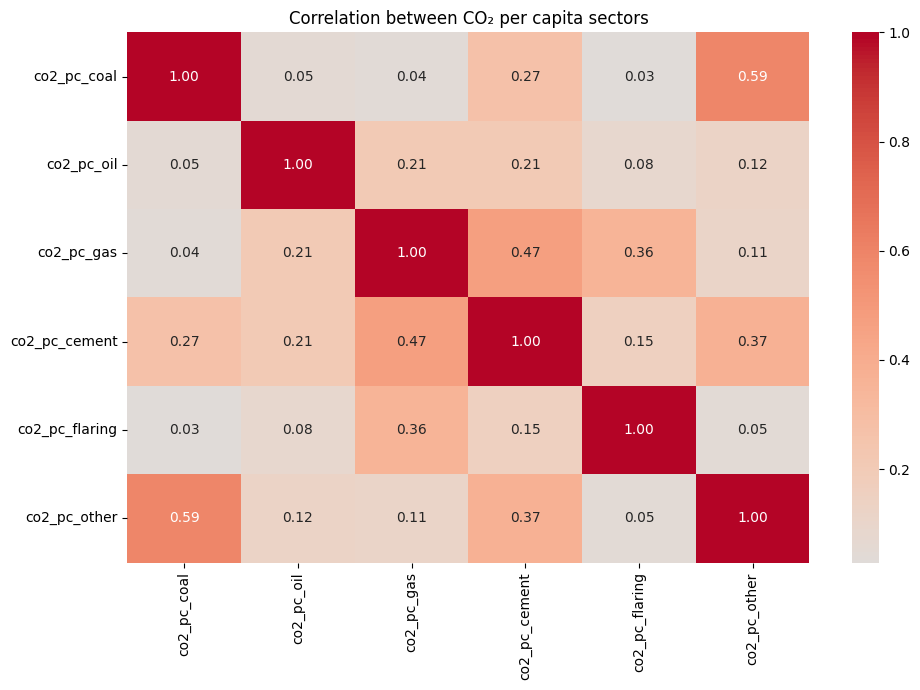

In [16]:
corr = df_pc[["co2_pc_coal","co2_pc_oil","co2_pc_gas",
                "co2_pc_cement","co2_pc_flaring","co2_pc_other"]].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation between CO₂ per capita sectors")
plt.tight_layout()
plt.show()